In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.shape

(6497, 13)

In [4]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.isna().sum().sum()

38

In [6]:
df = df.dropna()

In [7]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df = df.drop(columns = 'type', axis=1)

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = 'quality')
y = df['quality']

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [11]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
from time import time
clf = RandomForestClassifier(n_estimators=100, n_jobs=1)

start_time = time()
clf.fit(X_train,y_train)
end_time = time()
time_1 = end_time - start_time
print("Time taken: ", format(time_1))


Time taken:  0.671931266784668


In [13]:
# n_jobs parameter in RandomForestClassifier is reponsible for cpu assignment for training purposes; -1 -> all; 1-> just 1 core

In [14]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=2)
start_time = time()
clf.fit(X_train,y_train)
end_time = time()
time_1 = end_time - start_time
print("Time taken: ", format(time_1))

Time taken:  0.387357234954834


In [15]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=3)
start_time = time()
clf.fit(X_train,y_train)
end_time = time()
time_1 = end_time - start_time
print("Time taken: ", format(time_1))

Time taken:  0.29029083251953125


In [16]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
start_time = time()
clf.fit(X_train,y_train)
end_time = time()
time_1 = end_time - start_time
print("Time taken: ", format(time_1))

Time taken:  0.16652417182922363


In [17]:
core_count=[]
time_taken=[]

for i in range(1,16):
    clf = RandomForestClassifier(n_estimators=100, n_jobs=i)
    start_time = time()
    clf.fit(X_train,y_train)
    end_time = time()
    time_1 = end_time - start_time
    core_count.append(i)
    time_taken.append(time_1)
    print("Time taken with", i,"cores:", format(time_1))

Time taken with 1 cores: 0.6764914989471436
Time taken with 2 cores: 0.3910820484161377
Time taken with 3 cores: 0.29848194122314453
Time taken with 4 cores: 0.246506929397583
Time taken with 5 cores: 0.22481203079223633
Time taken with 6 cores: 0.20434808731079102
Time taken with 7 cores: 0.1956024169921875
Time taken with 8 cores: 0.18491315841674805
Time taken with 9 cores: 0.18194580078125
Time taken with 10 cores: 0.16974782943725586
Time taken with 11 cores: 0.17390775680541992
Time taken with 12 cores: 0.16942238807678223
Time taken with 13 cores: 0.16622233390808105
Time taken with 14 cores: 0.1764812469482422
Time taken with 15 cores: 0.1799473762512207


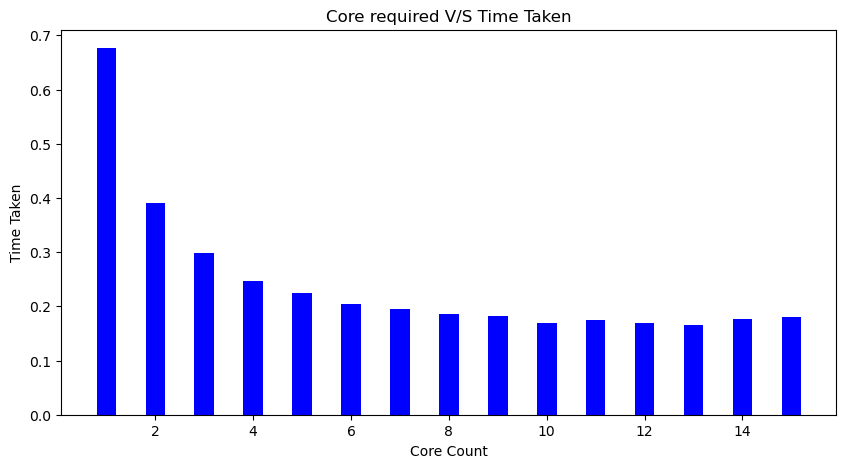

In [18]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
plt.bar(core_count, time_taken, color ='blue',
        width = 0.4)
 
plt.xlabel("Core Count")
plt.ylabel("Time Taken")
plt.title("Core required V/S Time Taken")
plt.show()

In [19]:
# y_pred = clf.predict([ [7.6,0.18,0.46,10.2 ,0.055 ,58.0 ,135.0 ,0.99680 ,3.14 ,0.43 ,9.9],[6.8,0.19,0.17,17.5,21,114,0.99,2.86,0.5,9.5,2.2] ])
# print(y_pred)

In [20]:
y_pred = clf.predict(X_test)
y_pred

array([6, 5, 6, ..., 6, 5, 6], dtype=int64)

In [21]:
from sklearn import metrics
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6991492652745553
